In [2]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from functions_and_objects import (impute_means_zeros_maxs_X,parse_percentage,
                                   clean_LC_data_classification_eval,preprocessing_eval, 
                                   columns_list, nan_max_cols, nan_mean_cols, nan_zero_cols, dtype,
                                   one_hot_encode_eval, concat_X_and_6ohe_dfs,
                                   prep_all_df_for_classification,
                                   classification_model_eval_prep_pipeline,
                                   current_pipeline)

import joblib
from sklearn.metrics import (accuracy_score, precision_score, recall_score, #classification
                             f1_score, roc_auc_score, roc_curve,precision_recall_fscore_support, #classification
                             r2_score,mean_squared_error) #regression

from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Test Cleaning/Preprocessing Functions

In [3]:
raw_q42017 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2017Q4.csv',header=1)
raw_q32017 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2017Q3.csv',header=1)
raw_q22017 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2017Q2.csv',header=1)
raw_q12017 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2017Q1.csv',header=1)
raw_q42016 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2016Q4.csv',header=1)
raw_q32016 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2016Q3.csv',header=1)
raw_q22016 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2016Q2.csv',header=1)
raw_q12016 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2016Q1.csv',header=1)
raw_2015 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2015.csv',header=1)
raw_2014 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2014.csv',header=1)
raw_2012to2013 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2012to2013.csv',header=1)
raw_2007to2011 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2007to2011.csv',header=1)

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,118) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,19,59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/

In [4]:
dfs_list = [raw_q42017,raw_q32017,raw_q22017,raw_q12017,
           raw_q42016,raw_q32016,raw_q22016,raw_q12016,raw_2015,
           raw_2014,raw_2012to2013, raw_2007to2011]

In [5]:
(X_train_classif, X_test_classif, y_train_classif, y_test_classif) = classification_model_eval_prep_pipeline(dfs_list)

/home/jupyter/peervest/functions_and_objects.py:243: FutureWarning: Passing datetime64-dtype data to TimedeltaIndex is deprecated, will raise a TypeError in a future version
  raw_lc_df['earliest_cr_line'] = pd.to_timedelta(pd.to_datetime(raw_lc_df['earliest_cr_line'])).dt.days
/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/home/jupyter/peervest/functions_and_objects.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X_train[col] = X_train[col].fillna(0.0)
/home/jupyter/peervest/functions_and_objects.py:197: Setti

In [6]:
print(X_train_classif.shape)
print(y_train_classif.shape)
print(X_test_classif.shape)
print(y_test_classif.shape)

(880950, 1108)
(880950, 1)
(377551, 1108)
(377551, 1)


### Neural Network Classification Model

##### Fit

In [8]:
ss = StandardScaler()
X_train_classif_s = ss.fit_transform(X_train_classif)
X_test_classif_s = ss.transform(X_test_classif)

In [9]:
np.array(y_train_classif['loan_status'])

array([1, 0, 1, ..., 1, 0, 1], dtype=object)

In [10]:
model = Sequential()
n_input = X_train_classif_s.shape[1]
n_hidden = n_input

model.add(Dense(n_hidden, input_dim=n_input, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(rate=0.2))
model.add(Dense(562,activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(rate=0.2))
model.add(Dense(50,activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(10,activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.0001)))

W0704 06:44:47.308649 139647389816576 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0704 06:44:47.331411 139647389816576 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0704 06:44:47.336163 139647389816576 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0704 06:44:47.360059 139647389816576 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0704 06:44:47.372047 

In [11]:
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

W0704 06:44:47.727388 139647389816576 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0704 06:44:47.736507 139647389816576 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0704 06:44:47.743264 139647389816576 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-08, patience=0, verbose=1, mode='auto')
callbacks_list = [early_stop]

In [13]:
history_log = model.fit(X_train_classif_s, y_train_classif, 
                        validation_data=(X_test_classif_s, y_test_classif), 
                        epochs=7, 
                        callbacks=callbacks_list, 
                        batch_size=500)

Train on 880950 samples, validate on 377551 samples
Epoch 1/7
880950/880950 [==============================] - 429s 488us/step - loss: 0.1817 - acc: 0.9637 - val_loss: 0.1307 - val_acc: 0.9693
Epoch 2/7
880950/880950 [==============================] - 433s 492us/step - loss: 0.1028 - acc: 0.9786 - val_loss: 0.1084 - val_acc: 0.9730
Epoch 3/7
880950/880950 [==============================] - 426s 484us/step - loss: 0.0869 - acc: 0.9814 - val_loss: 0.0876 - val_acc: 0.9814
Epoch 4/7
880950/880950 [==============================] - 430s 488us/step - loss: 0.0756 - acc: 0.9835 - val_loss: 0.0698 - val_acc: 0.9855
Epoch 5/7
880950/880950 [==============================] - 434s 492us/step - loss: 0.0680 - acc: 0.9846 - val_loss: 0.0755 - val_acc: 0.9799
Epoch 00005: early stopping


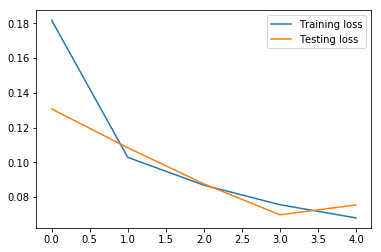

In [14]:
plt.plot(history_log.history['loss'], label='Training loss')
plt.plot(history_log.history['val_loss'], label='Testing loss')
plt.legend();

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1108)              1228772   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1108)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 562)               623258    
_________________________________________________________________
dropout_2 (Dropout)          (None, 562)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                28150     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total para

In [16]:
filename = 'nn_v2.joblib'
joblib.dump(model, filename)

['nn_v2.joblib']

In [17]:
y_test_classif_preds = model.predict_classes(X_test_classif_s)

In [18]:
y_test_classif_preds

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int32)

In [19]:
y_test_classif['loan_status'] = y_test_classif['loan_status'].astype(int)

##### Predict & Eval

In [21]:
print ("Precision Fully Paid: {}".format(precision_score(y_test_classif['loan_status'],y_test_classif_preds)))
print ("Recall Fully Paid: {}".format(recall_score(y_test_classif['loan_status'],y_test_classif_preds)))
print ("F-1 Score Fully Paid: {}".format(f1_score(y_test_classif['loan_status'],y_test_classif_preds)))
print ("ROC-AUC Score: {}".format(roc_auc_score(y_test_classif['loan_status'],y_test_classif_preds)))

Precision Fully Paid: 0.9872847917296892
Recall Fully Paid: 0.9877719804983321
F-1 Score Fully Paid: 0.9875283260263971
ROC-AUC Score: 0.9676073977542289


In [22]:
#precision, recall, f1-score
print ("Precision, Recall, F, & Support By Class [0,1] aka [Default,Fully Paid]: {}".format(
    precision_recall_fscore_support(y_test_classif['loan_status'],y_test_classif_preds)))

print ("Precision, Recall, F, & Support Weighted Average by Support: {}".format(
    precision_recall_fscore_support(y_test_classif['loan_status'],y_test_classif_preds,average='weighted')))

Precision, Recall, F, & Support By Class [0,1] aka [Default,Fully Paid]: (array([0.94937829, 0.98728479]), array([0.94744282, 0.98777198]), array([0.94840957, 0.98752833]), array([ 73577, 303974]))
Precision, Recall, F, & Support Weighted Average by Support: (0.9798975874129687, 0.9799126475628458, 0.9799048766738255, None)
